# Временные ряды потребления контента и усиление их прогнозирующих свойств построением сплит-моделей

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as skl

## Чтение данных

In [2]:
df = pd.read_csv('data.csv')
df

,Дата,Просмотры
0,2023-03-28,1557
1,2023-03-29,1313
2,2023-03-30,1248
3,2023-03-31,947
4,2023-04-01,742
...,...,...
88,2023-06-24,714
89,2023-06-25,1170
90,2023-06-26,1154
91,2023-06-27,980


## Разведочный анализ

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Дата       93 non-null     object
 1   Просмотры  93 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


## Визуализация временного ряда

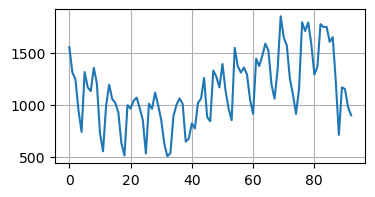

In [4]:
plt.figure(figsize = (4, 2))
plt.grid()
plt.plot(df['Просмотры'])
#plt.savefig('Общая кривая.png', dpi = 300, bbox_inches = 'tight')
plt.show()

## Построение и обучение регрессионных моделей

### Предварительная подготовка данных

Здесь мы добавляем в качестве предиктора порядковый номер наблюдения, а дату, наоборот, удаляем.

In [5]:
# Добавили номер
df['Номер'] = df.index

# Дропнули дату
df = df.drop(columns = ['Дата'])

# А дальше считаем, что номер -- это и есть дата
df['Дата'] = df['Номер']
df = df.drop(columns = ['Номер'])
df

,Просмотры,Дата
0,1557,0
1,1313,1
2,1248,2
3,947,3
4,742,4
...,...,...
88,714,88
89,1170,89
90,1154,90
91,980,91


### Линейная регрессионная модель

In [6]:
X = df.drop(columns = ['Просмотры'])
y = df['Просмотры']

model = skl.LinearRegression()
model.fit(X, y)
model.score(X, y)

0.22003625221431156

### Квадратичная регрессионная модель

In [7]:
# Добавляем квадрат предиктора
df['Квадрат даты'] = df['Дата']**2

X = df.drop(columns = ['Просмотры'])
y = df['Просмотры']

model = skl.LinearRegression()
model.fit(X, y)
model.score(X, y)

0.25319847370656257

### Кубическая регрессионная модель

In [8]:
# Добавляем третью степень
df['Куб даты'] = df['Дата']**3

X = df.drop(columns = ['Просмотры'])
y = df['Просмотры']

model = skl.LinearRegression()
model.fit(X, y)
model.score(X, y)

0.4813879925280553

### Визуализация моделей

Рисуем картинки на полных данных.

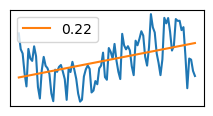

In [9]:
df = pd.read_csv('data.csv')
df['Номер'] = df.index
df = df.drop(columns = ['Дата'])
df['Дата'] = df['Номер']
df = df.drop(columns = ['Номер'])

X = df.drop(columns = ['Просмотры'])
y = df['Просмотры']

model = skl.LinearRegression()
model.fit(X, y)
model.score(X, y)

plt.figure(figsize = (2.5, 1.25))
plt.grid()

ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])

plt.plot(df['Просмотры'], '-')
plt.plot(df['Дата'].to_numpy(), model.predict(X), label = str(round(model.score(X, y), 2)))
plt.legend()
#plt.savefig('1. Линейная модель.png', dpi = 300, bbox_inches = 'tight', pad_inches = 0.02)
plt.show()

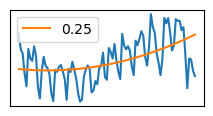

In [10]:
df = pd.read_csv('data.csv')
df['Номер'] = df.index
df = df.drop(columns = ['Дата'])
df['Дата'] = df['Номер']
df = df.drop(columns = ['Номер'])

df['Квадрат даты'] = df['Дата']**2

X = df.drop(columns = ['Просмотры'])
y = df['Просмотры']

model = skl.LinearRegression()
model.fit(X, y)
model.score(X, y)

plt.figure(figsize = (2.5, 1.25))
plt.grid()

ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])

plt.plot(df['Просмотры'], '-')
plt.plot(df['Дата'].to_numpy(), model.predict(X), label = str(round(model.score(X, y), 2)))
plt.legend()
#plt.savefig('2. Квадратичная модель.png', dpi = 300, bbox_inches = 'tight', pad_inches = 0.02)
plt.show()

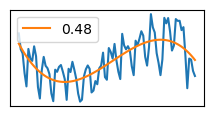

In [11]:
df = pd.read_csv('data.csv')
df['Номер'] = df.index
df = df.drop(columns = ['Дата'])
df['Дата'] = df['Номер']
df = df.drop(columns = ['Номер'])

df['Квадрат даты'] = df['Дата']**2
df['Куб даты'] = df['Дата']**3

X = df.drop(columns = ['Просмотры'])
y = df['Просмотры']

model = skl.LinearRegression()
model.fit(X, y)
model.score(X, y)

plt.figure(figsize = (2.5, 1.25))
plt.grid()

ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])

plt.plot(df['Просмотры'], '-')
plt.plot(df['Дата'].to_numpy(), model.predict(X), label = str(round(model.score(X, y), 2)))
plt.legend()
#plt.savefig('3. Кубическая модель.png', dpi = 300, bbox_inches = 'tight', pad_inches = 0.02)
plt.show()

## Повторное чтение данных

Здесь вспоминаем, что даты нужно читать как даты, а не как строки.

In [12]:
# Читаем даты как даты
df = pd.read_csv('data.csv', parse_dates=['Дата'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Дата       93 non-null     datetime64[ns]
 1   Просмотры  93 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


## Построение дополнительного признака

А раз у нас теперь есть даты, то можно выяснить, какие тогда были дни недели.

In [13]:
# Заводим новый признак и записываем в него код дня недели: 0 -- пнд, 1 -- втр и т. д.
df = pd.read_csv('data.csv', parse_dates=['Дата'])
df['День недели'] = df['Дата'].dt.dayofweek
df

,Дата,Просмотры,День недели
0,2023-03-28,1557,1
1,2023-03-29,1313,2
2,2023-03-30,1248,3
3,2023-03-31,947,4
4,2023-04-01,742,5
...,...,...,...
88,2023-06-24,714,5
89,2023-06-25,1170,6
90,2023-06-26,1154,0
91,2023-06-27,980,1


## Визуализация дополнительного признака

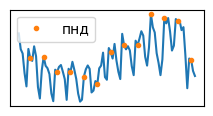

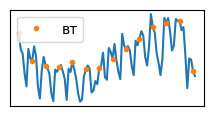

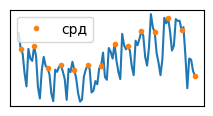

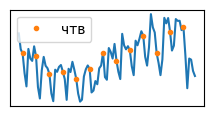

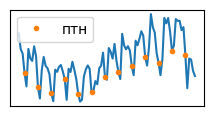

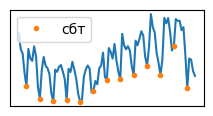

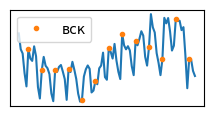

In [14]:
day = ['пнд', 'вт', 'срд', 'чтв', 'птн', 'сбт', 'вск']

for i in range(7):

    plt.figure(figsize = (2.5, 1.25))
    plt.grid()
    
    ax = plt.gca()
    ax.axes.xaxis.set_ticks([])
    ax.axes.yaxis.set_ticks([])
    
    plt.plot(df['Просмотры'], '-')
    plt.plot(df.loc[df['День недели'] == i]['Просмотры'], '.', label = day[i])
    plt.legend(loc = 2)
    #plt.savefig(str(i) + day[i] + '.png', dpi = 300, bbox_inches = 'tight', pad_inches = 0.02)
    plt.show()

## Построение и обучение частичных регрессионных моделей

### Модель на понедельниках

In [15]:
# Берем локализацию на понедельники
df_1 = df.loc[df['День недели'] == 0]
# Дропаем дату потому что она строковая, и   день недели, потому что в этой локализации он константный 0
df_1 = df_1.drop(columns = ['Дата', 'День недели'])
# Заводим предиктор
df_1['Номер'] = df_1.index
df_1

,Просмотры,Номер
6,1171,6
13,1196,13
20,966,20
27,963,27
34,894,34
41,775,41
48,1272,48
55,1373,55
62,1374,62
69,1853,69


Строим линейную модель. Результат так себе:

In [16]:
X = df_1.drop(columns = ['Просмотры'])
y = df_1['Просмотры']

model = skl.LinearRegression()
model.fit(X, y)
model.score(X, y)

0.38993261795780465

Строим квадратичную. Результат тоже не радует:

In [17]:
df_1['Квадрат номера'] = df_1['Номер']**2

X = df_1.drop(columns = ['Просмотры'])
y = df_1['Просмотры']

model = skl.LinearRegression()
model.fit(X, y)
model.score(X, y)

0.40463934431461934

Строим кубическую модель. Полючается более-менее прилично:

In [18]:
df_1['Куб номера'] = df_1['Номер']**3

X = df_1.drop(columns = ['Просмотры'])
y = df_1['Просмотры']

model = skl.LinearRegression()
model.fit(X, y)
model.score(X, y)

0.7918553400040708

Рисуем картинку:

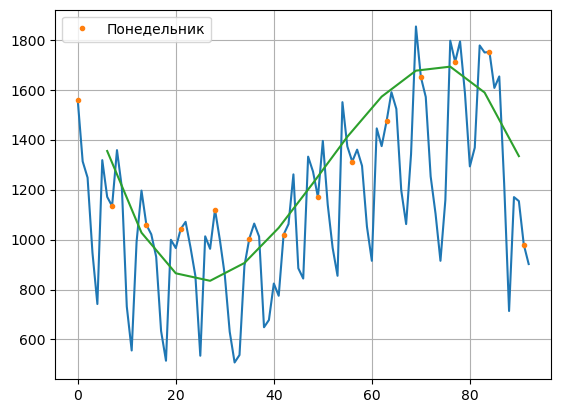

In [19]:
plt.grid()
plt.plot(df['Просмотры'], '-')
plt.plot(df.loc[df['День недели'] == 1]['Просмотры'], '.', label = 'Понедельник')
plt.plot(df_1['Номер'].to_numpy(), model.predict(X))
plt.legend()
plt.show()

Самое главное, что мы поняли на понедельниках, это то, что нам не помогут ни линейная, ни квадратичная модель. Поэтому дальше мы их даже не будем пробовать. Будем всегда ориентироваться на кубическую модель.

### Модели на остальных днях недели

Строим список датафреймов, локализованных по дням недели.

In [20]:
d = []

for i in range(7):
    dl = df.loc[df['День недели'] == i]
    dl = dl.drop(columns = ['Дата', 'День недели'])
    dl['Номер'] = dl.index
    d.append(dl)

Дальше в цикле повторяем все то, что мы делали для понедельника.

А заодно накапливаем сумму квадратов отклонений пмодельных значений от истинных для того, чтобы после выхода из цикла посчитать общий коэффициент детерминации.


пнд
Index(['Просмотры', 'Номер', '2', '3'], dtype='object')
1789.421904625936
[-8.55687960e+01  2.27369569e+00 -1.53239618e-02]


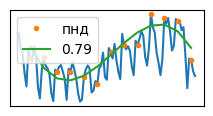


вт
Index(['Просмотры', 'Номер', '2', '3'], dtype='object')
1575.2983193278917
[-6.11187076e+01  1.70413245e+00 -1.18033727e-02]


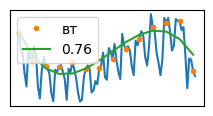


срд
Index(['Просмотры', 'Номер', '2', '3'], dtype='object')
1536.0606590288571
[-5.73905002e+01  1.67797089e+00 -1.19953076e-02]


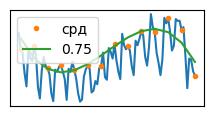


чтв
Index(['Просмотры', 'Номер', '2', '3'], dtype='object')
1331.5792472832723
[-3.21736911e+01  8.11932965e-01 -4.66115517e-03]


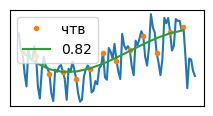


птн
Index(['Просмотры', 'Номер', '2', '3'], dtype='object')
1018.4471243043379
[-3.30131654e+01  9.05647924e-01 -5.72641644e-03]


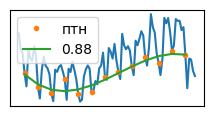


сбт
Index(['Просмотры', 'Номер', '2', '3'], dtype='object')
889.4622673245535
[-4.12487266e+01  1.25005097e+00 -8.90351145e-03]


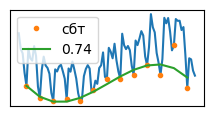


вск
Index(['Просмотры', 'Номер', '2', '3'], dtype='object')
1621.712511977893
[-6.87657054e+01  1.81828631e+00 -1.22895812e-02]


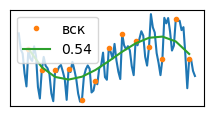

In [21]:
# Это сумма квадратов отклониений модели от истины. Понадибится в числителе r2
S_star = 0

for i in range(7):
    # Добиваем очередной локализованный датафрейм квадратами и кубами
    d[i]['2'] = d[i]['Номер']**2
    d[i]['3'] = d[i]['Номер']**3
    
    # Строим модель, считаем скор
    X = d[i].drop(columns = ['Просмотры'])
    y = d[i]['Просмотры']

    model = skl.LinearRegression()
    model.fit(X, y)
    model.score(X, y)
    
    # Выводим данные, которые будем использовать в статье
    print('')
    print(day[i])
    print(d[i].columns)
    print(model.intercept_)
    print(model.coef_)
    
    y_pred = model.predict(X)
    
    # Накапливаем S_star
    S_star = S_star + ((y - y_pred)**2).sum()

    # Рисуем картинку
    plt.figure(figsize = (2.5, 1.25))
    plt.grid()
    
    ax = plt.gca()
    ax.axes.xaxis.set_ticks([])
    ax.axes.yaxis.set_ticks([])
    
    plt.plot(df['Просмотры'], '-')
    plt.plot(df.loc[df['День недели'] == i]['Просмотры'], '.', label = day[i])
    plt.plot(d[i]['Номер'].to_numpy(), model.predict(X), label = str(round(model.score(X, y), 2)))
    plt.legend()
    #plt.savefig(str(i) + day[i] + 'скор.png', dpi = 300, bbox_inches = 'tight', pad_inches = 0.02)
    plt.show()

Наконец, вспоминаем определение коэффициента детерминации и считаем его на полных данных. Получается неплохо.

In [22]:
R2 = 1 - S_star/((df['Просмотры'] - df['Просмотры'].mean())**2).sum()
R2

0.8218103623674864